# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 45kB/s  eta 0:00:01   53% |█████████████████▏              | 7.8MB 44.6MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

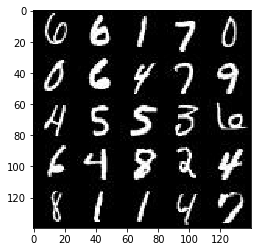

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

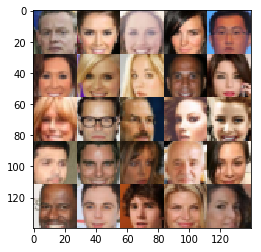

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_inputs = tf.placeholder(tf.float32,shape=(None, image_width, image_height, image_channels), name='input_real')
    z_input = tf.placeholder(tf.float32,shape=(None, z_dim), name='z_input')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return real_inputs, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    
    with tf.variable_scope('discriminator', reuse=reuse):
        conv1= tf.layers.conv2d(images, 64, kernel_size=4, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        conv1= tf.maximum(0.2*conv1, conv1)
        
        conv2= tf.layers.conv2d(conv1, 128, kernel_size=4, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        conv2= tf.layers.batch_normalization(conv2, training=True)
        conv2= tf.maximum(0.2*conv2, conv2)
        
        conv3= tf.layers.conv2d(conv2, 256, kernel_size=4, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        conv3= tf.layers.batch_normalization(conv3, training=True)
        conv3= tf.maximum(0.2*conv3, conv3)
        
        conv4= tf.layers.conv2d(conv3, 512, kernel_size=4, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        conv4= tf.layers.batch_normalization(conv4, training=True)
        conv4= tf.maximum(0.2*conv4, conv4)
        
        flat= tf.reshape(conv4, (-1, 4*4*512))
        logits= tf.layers.dense(flat,1, kernel_initializer=tf.truncated_normal_initializer(stddev=0.02))
        logits = tf.layers.dropout(logits, rate=0.5)
        output= tf.sigmoid(logits)
        
        

    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        layer1 = tf.layers.dense(z, 2*2*512, kernel_initializer=tf.truncated_normal_initializer(stddev=0.02))
        layer1 = tf.reshape(layer1, (-1, 2, 2, 256))
        layer1 = tf.nn.relu(layer1)
                
        layer2 = tf.layers.conv2d_transpose(layer1, 256, 5, strides=2, padding='valid', kernel_initializer=tf.contrib.layers.xavier_initializer())
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.nn.relu(layer2)

        layer3 = tf.layers.conv2d_transpose(layer2, 128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        layer3 = tf.layers.batch_normalization(layer3, training=is_train)
        layer3 = tf.nn.relu(layer3)

        logits = tf.layers.conv2d_transpose(layer3, out_channel_dim, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())       
        output = tf.tanh(logits)
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    generator_model = generator(input_z, out_channel_dim)
    discriminator_real, discriminator_logits_real = discriminator(input_real, reuse=False)
    discriminator_fake, discriminator_logits_fake = discriminator(generator_model, reuse=True)
    
    discriminator_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=discriminator_logits_real, labels=tf.ones_like(discriminator_real*(1-smooth))))
    discriminator_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=discriminator_logits_fake, labels=tf.zeros_like(discriminator_fake)))
    generator_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=discriminator_logits_fake, labels=tf.ones_like(discriminator_fake)))
    
    discriminator_loss = discriminator_loss_real + discriminator_loss_fake
    return discriminator_loss, generator_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    discr_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gener_vars = [var for var in train_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        disc_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=discr_vars)
        gene_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gener_vars)
    
    return disc_train_opt, gene_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps +=1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, show_n_images, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 3.1666... Generator Loss: 6.8487
Epoch 1/2... Batch 20... Discriminator Loss: 2.4362... Generator Loss: 5.7362
Epoch 1/2... Batch 30... Discriminator Loss: 0.6308... Generator Loss: 0.9871
Epoch 1/2... Batch 40... Discriminator Loss: 3.3800... Generator Loss: 0.0386
Epoch 1/2... Batch 50... Discriminator Loss: 0.3897... Generator Loss: 1.2514
Epoch 1/2... Batch 60... Discriminator Loss: 0.4587... Generator Loss: 1.1407
Epoch 1/2... Batch 70... Discriminator Loss: 0.1396... Generator Loss: 2.4082
Epoch 1/2... Batch 80... Discriminator Loss: 0.6558... Generator Loss: 1.1508
Epoch 1/2... Batch 90... Discriminator Loss: 3.2647... Generator Loss: 0.0667
Epoch 1/2... Batch 100... Discriminator Loss: 1.5143... Generator Loss: 0.4232


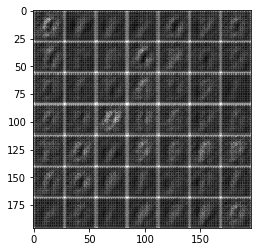

Epoch 1/2... Batch 110... Discriminator Loss: 1.7353... Generator Loss: 0.2346
Epoch 1/2... Batch 120... Discriminator Loss: 1.3330... Generator Loss: 0.3679
Epoch 1/2... Batch 130... Discriminator Loss: 1.5389... Generator Loss: 0.2857
Epoch 1/2... Batch 140... Discriminator Loss: 1.6158... Generator Loss: 0.2870
Epoch 1/2... Batch 150... Discriminator Loss: 1.5050... Generator Loss: 0.3364
Epoch 1/2... Batch 160... Discriminator Loss: 1.7399... Generator Loss: 0.2805
Epoch 1/2... Batch 170... Discriminator Loss: 1.5236... Generator Loss: 0.3003
Epoch 1/2... Batch 180... Discriminator Loss: 1.7385... Generator Loss: 0.2381
Epoch 1/2... Batch 190... Discriminator Loss: 1.8366... Generator Loss: 0.2144
Epoch 1/2... Batch 200... Discriminator Loss: 1.5461... Generator Loss: 0.2820


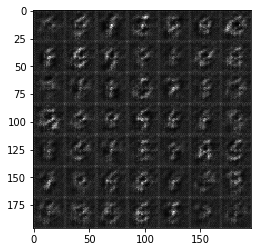

Epoch 1/2... Batch 210... Discriminator Loss: 1.5721... Generator Loss: 0.2764
Epoch 1/2... Batch 220... Discriminator Loss: 2.1513... Generator Loss: 0.1402
Epoch 1/2... Batch 230... Discriminator Loss: 1.9509... Generator Loss: 1.2954
Epoch 1/2... Batch 240... Discriminator Loss: 1.0965... Generator Loss: 1.0172
Epoch 1/2... Batch 250... Discriminator Loss: 1.0167... Generator Loss: 1.0039
Epoch 1/2... Batch 260... Discriminator Loss: 1.4026... Generator Loss: 1.7939
Epoch 1/2... Batch 270... Discriminator Loss: 1.1083... Generator Loss: 0.5958
Epoch 1/2... Batch 280... Discriminator Loss: 1.4306... Generator Loss: 1.9810
Epoch 1/2... Batch 290... Discriminator Loss: 1.8362... Generator Loss: 1.9958
Epoch 1/2... Batch 300... Discriminator Loss: 2.1298... Generator Loss: 2.8124


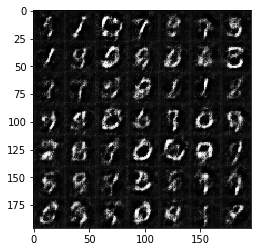

Epoch 1/2... Batch 310... Discriminator Loss: 2.4081... Generator Loss: 0.1147
Epoch 1/2... Batch 320... Discriminator Loss: 1.5349... Generator Loss: 0.3131
Epoch 1/2... Batch 330... Discriminator Loss: 1.4336... Generator Loss: 0.3619
Epoch 1/2... Batch 340... Discriminator Loss: 1.6974... Generator Loss: 0.2666
Epoch 1/2... Batch 350... Discriminator Loss: 1.3231... Generator Loss: 0.3718
Epoch 1/2... Batch 360... Discriminator Loss: 1.7084... Generator Loss: 0.2420
Epoch 1/2... Batch 370... Discriminator Loss: 1.6963... Generator Loss: 0.2421
Epoch 1/2... Batch 380... Discriminator Loss: 1.4894... Generator Loss: 0.2972
Epoch 1/2... Batch 390... Discriminator Loss: 2.1580... Generator Loss: 0.1485
Epoch 1/2... Batch 400... Discriminator Loss: 1.7597... Generator Loss: 0.2446


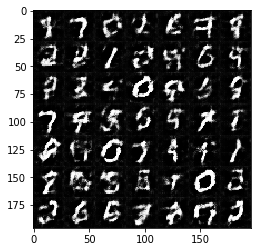

Epoch 1/2... Batch 410... Discriminator Loss: 1.5249... Generator Loss: 0.3156
Epoch 1/2... Batch 420... Discriminator Loss: 1.8589... Generator Loss: 0.1971
Epoch 1/2... Batch 430... Discriminator Loss: 0.9897... Generator Loss: 0.7817
Epoch 1/2... Batch 440... Discriminator Loss: 0.9339... Generator Loss: 1.2153
Epoch 1/2... Batch 450... Discriminator Loss: 1.1398... Generator Loss: 2.0136
Epoch 1/2... Batch 460... Discriminator Loss: 0.9162... Generator Loss: 1.3454
Epoch 1/2... Batch 470... Discriminator Loss: 2.0537... Generator Loss: 0.1654
Epoch 1/2... Batch 480... Discriminator Loss: 1.4777... Generator Loss: 0.3272
Epoch 1/2... Batch 490... Discriminator Loss: 0.9896... Generator Loss: 1.6755
Epoch 1/2... Batch 500... Discriminator Loss: 1.2722... Generator Loss: 1.3864


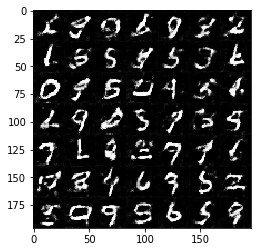

Epoch 1/2... Batch 510... Discriminator Loss: 0.8061... Generator Loss: 1.5582
Epoch 1/2... Batch 520... Discriminator Loss: 1.0472... Generator Loss: 1.4074
Epoch 1/2... Batch 530... Discriminator Loss: 1.0949... Generator Loss: 1.8550
Epoch 1/2... Batch 540... Discriminator Loss: 0.8331... Generator Loss: 1.5522
Epoch 1/2... Batch 550... Discriminator Loss: 0.6259... Generator Loss: 1.5587
Epoch 1/2... Batch 560... Discriminator Loss: 1.0810... Generator Loss: 1.5241
Epoch 1/2... Batch 570... Discriminator Loss: 0.9723... Generator Loss: 1.8875
Epoch 1/2... Batch 580... Discriminator Loss: 1.5546... Generator Loss: 1.6383
Epoch 1/2... Batch 590... Discriminator Loss: 0.7265... Generator Loss: 1.0240
Epoch 1/2... Batch 600... Discriminator Loss: 1.0610... Generator Loss: 0.6776


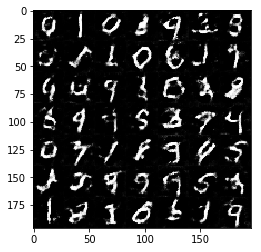

Epoch 1/2... Batch 610... Discriminator Loss: 1.1463... Generator Loss: 1.6081
Epoch 1/2... Batch 620... Discriminator Loss: 2.4621... Generator Loss: 2.2134
Epoch 1/2... Batch 630... Discriminator Loss: 1.0269... Generator Loss: 1.1492
Epoch 1/2... Batch 640... Discriminator Loss: 1.4464... Generator Loss: 1.8519
Epoch 1/2... Batch 650... Discriminator Loss: 1.6404... Generator Loss: 0.2473
Epoch 1/2... Batch 660... Discriminator Loss: 2.2726... Generator Loss: 0.1293
Epoch 1/2... Batch 670... Discriminator Loss: 1.3796... Generator Loss: 0.3709
Epoch 1/2... Batch 680... Discriminator Loss: 1.7269... Generator Loss: 0.2227
Epoch 1/2... Batch 690... Discriminator Loss: 1.9571... Generator Loss: 0.1890
Epoch 1/2... Batch 700... Discriminator Loss: 2.2236... Generator Loss: 0.1429


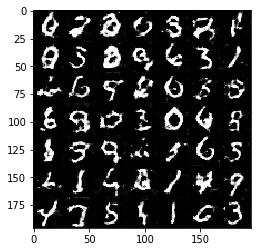

Epoch 1/2... Batch 710... Discriminator Loss: 1.3729... Generator Loss: 0.3940
Epoch 1/2... Batch 720... Discriminator Loss: 1.9723... Generator Loss: 0.1699
Epoch 1/2... Batch 730... Discriminator Loss: 1.8267... Generator Loss: 0.2148
Epoch 1/2... Batch 740... Discriminator Loss: 2.5720... Generator Loss: 0.0933
Epoch 1/2... Batch 750... Discriminator Loss: 1.2517... Generator Loss: 0.4334
Epoch 1/2... Batch 760... Discriminator Loss: 0.6402... Generator Loss: 1.2996
Epoch 1/2... Batch 770... Discriminator Loss: 1.0956... Generator Loss: 0.7438
Epoch 1/2... Batch 780... Discriminator Loss: 1.0989... Generator Loss: 1.8272
Epoch 1/2... Batch 790... Discriminator Loss: 1.0769... Generator Loss: 1.4260
Epoch 1/2... Batch 800... Discriminator Loss: 1.3775... Generator Loss: 0.3799


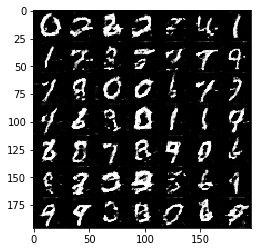

Epoch 1/2... Batch 810... Discriminator Loss: 1.5662... Generator Loss: 0.2944
Epoch 1/2... Batch 820... Discriminator Loss: 2.0548... Generator Loss: 0.1721
Epoch 1/2... Batch 830... Discriminator Loss: 1.1376... Generator Loss: 0.4995
Epoch 1/2... Batch 840... Discriminator Loss: 1.6458... Generator Loss: 0.2446
Epoch 1/2... Batch 850... Discriminator Loss: 1.9254... Generator Loss: 0.2166
Epoch 1/2... Batch 860... Discriminator Loss: 1.9421... Generator Loss: 0.2009
Epoch 1/2... Batch 870... Discriminator Loss: 1.5255... Generator Loss: 0.3332
Epoch 1/2... Batch 880... Discriminator Loss: 1.9423... Generator Loss: 0.1754
Epoch 1/2... Batch 890... Discriminator Loss: 1.7779... Generator Loss: 0.2258
Epoch 1/2... Batch 900... Discriminator Loss: 2.5302... Generator Loss: 0.0963


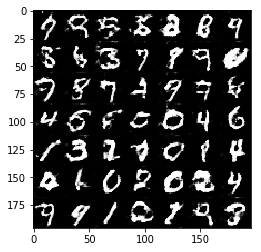

Epoch 1/2... Batch 910... Discriminator Loss: 2.1614... Generator Loss: 0.1526
Epoch 1/2... Batch 920... Discriminator Loss: 1.6944... Generator Loss: 0.2354
Epoch 1/2... Batch 930... Discriminator Loss: 2.5121... Generator Loss: 0.1002
Epoch 2/2... Batch 10... Discriminator Loss: 1.8822... Generator Loss: 0.2187
Epoch 2/2... Batch 20... Discriminator Loss: 0.8558... Generator Loss: 0.7088
Epoch 2/2... Batch 30... Discriminator Loss: 0.9868... Generator Loss: 1.8050
Epoch 2/2... Batch 40... Discriminator Loss: 1.2992... Generator Loss: 1.7922
Epoch 2/2... Batch 50... Discriminator Loss: 2.0115... Generator Loss: 2.8552
Epoch 2/2... Batch 60... Discriminator Loss: 1.5312... Generator Loss: 0.3176
Epoch 2/2... Batch 70... Discriminator Loss: 0.8315... Generator Loss: 0.8048
Epoch 2/2... Batch 80... Discriminator Loss: 0.9252... Generator Loss: 0.7321
Epoch 2/2... Batch 90... Discriminator Loss: 1.6046... Generator Loss: 0.2823
Epoch 2/2... Batch 100... Discriminator Loss: 0.7145... Gener

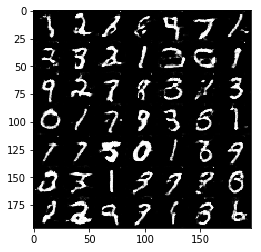

Epoch 2/2... Batch 110... Discriminator Loss: 1.3804... Generator Loss: 2.0579
Epoch 2/2... Batch 120... Discriminator Loss: 0.9873... Generator Loss: 0.7785
Epoch 2/2... Batch 130... Discriminator Loss: 1.5872... Generator Loss: 0.2908
Epoch 2/2... Batch 140... Discriminator Loss: 1.5551... Generator Loss: 0.2872
Epoch 2/2... Batch 150... Discriminator Loss: 1.4812... Generator Loss: 0.3048
Epoch 2/2... Batch 160... Discriminator Loss: 2.0026... Generator Loss: 0.1676
Epoch 2/2... Batch 170... Discriminator Loss: 1.6941... Generator Loss: 0.2459
Epoch 2/2... Batch 180... Discriminator Loss: 1.3309... Generator Loss: 0.3784
Epoch 2/2... Batch 190... Discriminator Loss: 1.5181... Generator Loss: 0.2932
Epoch 2/2... Batch 200... Discriminator Loss: 1.4339... Generator Loss: 0.3495


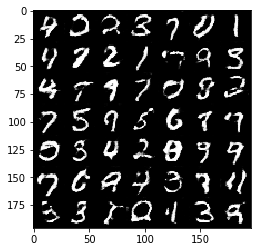

Epoch 2/2... Batch 210... Discriminator Loss: 1.6570... Generator Loss: 0.2661
Epoch 2/2... Batch 220... Discriminator Loss: 1.1227... Generator Loss: 0.4847
Epoch 2/2... Batch 230... Discriminator Loss: 1.0653... Generator Loss: 1.6976
Epoch 2/2... Batch 240... Discriminator Loss: 1.3842... Generator Loss: 0.3784
Epoch 2/2... Batch 250... Discriminator Loss: 1.3499... Generator Loss: 1.9959
Epoch 2/2... Batch 260... Discriminator Loss: 0.6201... Generator Loss: 1.4156
Epoch 2/2... Batch 270... Discriminator Loss: 1.2529... Generator Loss: 2.3717
Epoch 2/2... Batch 280... Discriminator Loss: 1.7364... Generator Loss: 2.9749
Epoch 2/2... Batch 290... Discriminator Loss: 1.5185... Generator Loss: 2.6466
Epoch 2/2... Batch 300... Discriminator Loss: 0.6216... Generator Loss: 1.8074


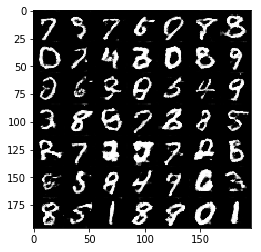

Epoch 2/2... Batch 310... Discriminator Loss: 1.7756... Generator Loss: 3.5343
Epoch 2/2... Batch 320... Discriminator Loss: 0.6779... Generator Loss: 1.2557
Epoch 2/2... Batch 330... Discriminator Loss: 0.9705... Generator Loss: 0.6543
Epoch 2/2... Batch 340... Discriminator Loss: 2.1967... Generator Loss: 0.1481
Epoch 2/2... Batch 350... Discriminator Loss: 1.6803... Generator Loss: 0.2624
Epoch 2/2... Batch 360... Discriminator Loss: 2.1390... Generator Loss: 0.1536
Epoch 2/2... Batch 370... Discriminator Loss: 1.7280... Generator Loss: 0.2356
Epoch 2/2... Batch 380... Discriminator Loss: 1.8390... Generator Loss: 0.2405
Epoch 2/2... Batch 390... Discriminator Loss: 1.8956... Generator Loss: 0.2071
Epoch 2/2... Batch 400... Discriminator Loss: 1.2219... Generator Loss: 0.4845


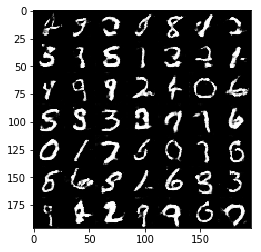

Epoch 2/2... Batch 410... Discriminator Loss: 1.1325... Generator Loss: 1.6769
Epoch 2/2... Batch 420... Discriminator Loss: 1.2740... Generator Loss: 0.4368
Epoch 2/2... Batch 430... Discriminator Loss: 1.4646... Generator Loss: 2.1229
Epoch 2/2... Batch 440... Discriminator Loss: 0.5153... Generator Loss: 1.4393
Epoch 2/2... Batch 450... Discriminator Loss: 2.0362... Generator Loss: 0.2084
Epoch 2/2... Batch 460... Discriminator Loss: 1.6528... Generator Loss: 0.2474
Epoch 2/2... Batch 470... Discriminator Loss: 2.0271... Generator Loss: 0.1710
Epoch 2/2... Batch 480... Discriminator Loss: 1.9973... Generator Loss: 0.1732
Epoch 2/2... Batch 490... Discriminator Loss: 1.9671... Generator Loss: 0.1801
Epoch 2/2... Batch 500... Discriminator Loss: 1.3934... Generator Loss: 0.3671


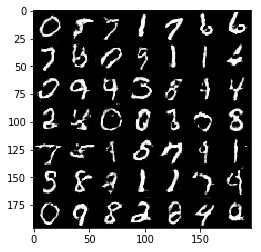

Epoch 2/2... Batch 510... Discriminator Loss: 1.3120... Generator Loss: 0.4366
Epoch 2/2... Batch 520... Discriminator Loss: 2.8882... Generator Loss: 5.0015
Epoch 2/2... Batch 530... Discriminator Loss: 0.8607... Generator Loss: 1.7131
Epoch 2/2... Batch 540... Discriminator Loss: 1.3308... Generator Loss: 2.2312
Epoch 2/2... Batch 550... Discriminator Loss: 0.7927... Generator Loss: 1.0316
Epoch 2/2... Batch 560... Discriminator Loss: 1.0325... Generator Loss: 0.5529
Epoch 2/2... Batch 570... Discriminator Loss: 0.8591... Generator Loss: 0.8802
Epoch 2/2... Batch 580... Discriminator Loss: 1.8921... Generator Loss: 0.2168
Epoch 2/2... Batch 590... Discriminator Loss: 1.5693... Generator Loss: 0.3057
Epoch 2/2... Batch 600... Discriminator Loss: 0.7209... Generator Loss: 2.4459


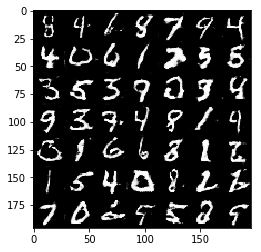

Epoch 2/2... Batch 610... Discriminator Loss: 2.0884... Generator Loss: 2.5833
Epoch 2/2... Batch 620... Discriminator Loss: 0.8378... Generator Loss: 2.0022
Epoch 2/2... Batch 630... Discriminator Loss: 1.6874... Generator Loss: 0.2697
Epoch 2/2... Batch 640... Discriminator Loss: 1.9707... Generator Loss: 0.1852
Epoch 2/2... Batch 650... Discriminator Loss: 1.0777... Generator Loss: 0.5411
Epoch 2/2... Batch 660... Discriminator Loss: 0.8073... Generator Loss: 1.9946
Epoch 2/2... Batch 670... Discriminator Loss: 0.5969... Generator Loss: 1.1036
Epoch 2/2... Batch 680... Discriminator Loss: 0.7661... Generator Loss: 2.4577
Epoch 2/2... Batch 690... Discriminator Loss: 0.7133... Generator Loss: 1.0126
Epoch 2/2... Batch 700... Discriminator Loss: 2.2632... Generator Loss: 3.4315


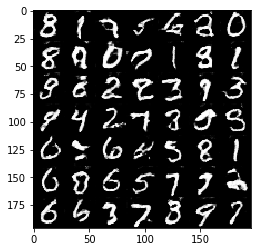

Epoch 2/2... Batch 710... Discriminator Loss: 1.5113... Generator Loss: 3.1994
Epoch 2/2... Batch 720... Discriminator Loss: 0.7793... Generator Loss: 1.4861
Epoch 2/2... Batch 730... Discriminator Loss: 0.8795... Generator Loss: 1.1480
Epoch 2/2... Batch 740... Discriminator Loss: 1.9542... Generator Loss: 3.5289
Epoch 2/2... Batch 750... Discriminator Loss: 1.3248... Generator Loss: 0.3744
Epoch 2/2... Batch 760... Discriminator Loss: 1.0039... Generator Loss: 0.6343
Epoch 2/2... Batch 770... Discriminator Loss: 2.4624... Generator Loss: 0.1152
Epoch 2/2... Batch 780... Discriminator Loss: 1.7078... Generator Loss: 0.2582
Epoch 2/2... Batch 790... Discriminator Loss: 2.1558... Generator Loss: 0.1509
Epoch 2/2... Batch 800... Discriminator Loss: 1.0245... Generator Loss: 0.5642


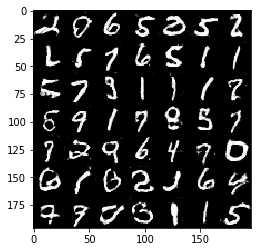

Epoch 2/2... Batch 810... Discriminator Loss: 2.1598... Generator Loss: 0.1551
Epoch 2/2... Batch 820... Discriminator Loss: 2.0569... Generator Loss: 0.1801
Epoch 2/2... Batch 830... Discriminator Loss: 1.4853... Generator Loss: 0.3097
Epoch 2/2... Batch 840... Discriminator Loss: 1.7792... Generator Loss: 2.3287
Epoch 2/2... Batch 850... Discriminator Loss: 0.5541... Generator Loss: 1.1249
Epoch 2/2... Batch 860... Discriminator Loss: 1.3699... Generator Loss: 3.8332
Epoch 2/2... Batch 870... Discriminator Loss: 2.7242... Generator Loss: 0.0896
Epoch 2/2... Batch 880... Discriminator Loss: 1.1076... Generator Loss: 1.9367
Epoch 2/2... Batch 890... Discriminator Loss: 1.3441... Generator Loss: 2.0911
Epoch 2/2... Batch 900... Discriminator Loss: 1.8622... Generator Loss: 0.2103


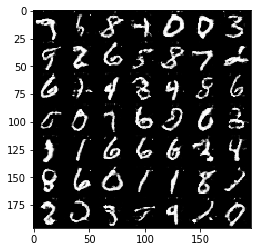

Epoch 2/2... Batch 910... Discriminator Loss: 2.3584... Generator Loss: 0.1392
Epoch 2/2... Batch 920... Discriminator Loss: 0.4782... Generator Loss: 1.4241
Epoch 2/2... Batch 930... Discriminator Loss: 2.2647... Generator Loss: 0.1417


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Epoch 1/1... Batch 10... Discriminator Loss: 4.8471... Generator Loss: 0.0121
Epoch 1/1... Batch 20... Discriminator Loss: 1.2689... Generator Loss: 0.4679
Epoch 1/1... Batch 30... Discriminator Loss: 0.4461... Generator Loss: 1.4530
Epoch 1/1... Batch 40... Discriminator Loss: 2.4859... Generator Loss: 0.0970
Epoch 1/1... Batch 50... Discriminator Loss: 0.8678... Generator Loss: 0.6541
Epoch 1/1... Batch 60... Discriminator Loss: 0.8491... Generator Loss: 0.6705
Epoch 1/1... Batch 70... Discriminator Loss: 0.2003... Generator Loss: 5.0038
Epoch 1/1... Batch 80... Discriminator Loss: 1.8470... Generator Loss: 2.9902
Epoch 1/1... Batch 90... Discriminator Loss: 1.2208... Generator Loss: 0.7275
Epoch 1/1... Batch 100... Discriminator Loss: 0.8703... Generator Loss: 3.0516


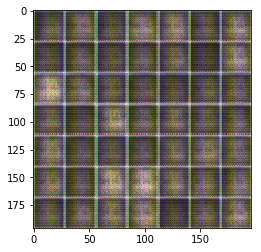

Epoch 1/1... Batch 110... Discriminator Loss: 1.3640... Generator Loss: 0.5321
Epoch 1/1... Batch 120... Discriminator Loss: 0.9645... Generator Loss: 0.7097
Epoch 1/1... Batch 130... Discriminator Loss: 0.7826... Generator Loss: 0.9134
Epoch 1/1... Batch 140... Discriminator Loss: 1.6208... Generator Loss: 0.3762
Epoch 1/1... Batch 150... Discriminator Loss: 1.4588... Generator Loss: 0.3853
Epoch 1/1... Batch 160... Discriminator Loss: 1.3240... Generator Loss: 0.8558
Epoch 1/1... Batch 170... Discriminator Loss: 1.1666... Generator Loss: 1.6954
Epoch 1/1... Batch 180... Discriminator Loss: 1.2544... Generator Loss: 1.5902
Epoch 1/1... Batch 190... Discriminator Loss: 0.8642... Generator Loss: 1.3669
Epoch 1/1... Batch 200... Discriminator Loss: 0.9434... Generator Loss: 2.1580


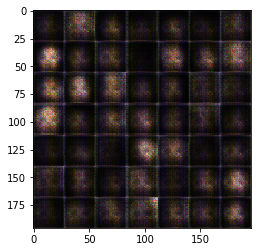

Epoch 1/1... Batch 210... Discriminator Loss: 1.4770... Generator Loss: 0.3254
Epoch 1/1... Batch 220... Discriminator Loss: 1.0209... Generator Loss: 2.1620
Epoch 1/1... Batch 230... Discriminator Loss: 0.6148... Generator Loss: 1.6653
Epoch 1/1... Batch 240... Discriminator Loss: 0.8890... Generator Loss: 2.4527
Epoch 1/1... Batch 250... Discriminator Loss: 0.6653... Generator Loss: 1.4308
Epoch 1/1... Batch 260... Discriminator Loss: 0.8973... Generator Loss: 0.7944
Epoch 1/1... Batch 270... Discriminator Loss: 0.8524... Generator Loss: 1.0594
Epoch 1/1... Batch 280... Discriminator Loss: 1.1826... Generator Loss: 0.7074
Epoch 1/1... Batch 290... Discriminator Loss: 1.7102... Generator Loss: 0.2863
Epoch 1/1... Batch 300... Discriminator Loss: 1.3772... Generator Loss: 0.4763


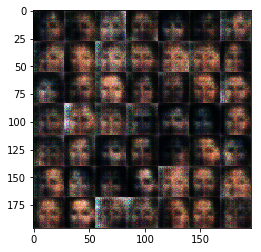

Epoch 1/1... Batch 310... Discriminator Loss: 2.0803... Generator Loss: 0.1803
Epoch 1/1... Batch 320... Discriminator Loss: 1.3048... Generator Loss: 0.4054
Epoch 1/1... Batch 330... Discriminator Loss: 1.4669... Generator Loss: 0.3207
Epoch 1/1... Batch 340... Discriminator Loss: 1.6643... Generator Loss: 0.2500
Epoch 1/1... Batch 350... Discriminator Loss: 1.2633... Generator Loss: 0.4522
Epoch 1/1... Batch 360... Discriminator Loss: 2.0981... Generator Loss: 0.1743
Epoch 1/1... Batch 370... Discriminator Loss: 0.7605... Generator Loss: 0.9785
Epoch 1/1... Batch 380... Discriminator Loss: 0.9781... Generator Loss: 1.1819
Epoch 1/1... Batch 390... Discriminator Loss: 1.1353... Generator Loss: 0.7349
Epoch 1/1... Batch 400... Discriminator Loss: 1.4641... Generator Loss: 1.2710


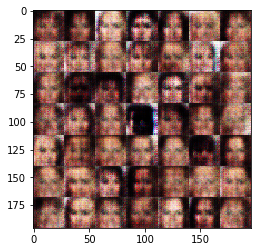

Epoch 1/1... Batch 410... Discriminator Loss: 1.1307... Generator Loss: 1.4962
Epoch 1/1... Batch 420... Discriminator Loss: 1.0765... Generator Loss: 1.4242
Epoch 1/1... Batch 430... Discriminator Loss: 0.9149... Generator Loss: 1.8586
Epoch 1/1... Batch 440... Discriminator Loss: 0.8851... Generator Loss: 1.2150
Epoch 1/1... Batch 450... Discriminator Loss: 0.8221... Generator Loss: 1.6409
Epoch 1/1... Batch 460... Discriminator Loss: 2.1652... Generator Loss: 0.1528
Epoch 1/1... Batch 470... Discriminator Loss: 1.4875... Generator Loss: 0.3387
Epoch 1/1... Batch 480... Discriminator Loss: 1.9591... Generator Loss: 0.2241
Epoch 1/1... Batch 490... Discriminator Loss: 1.4752... Generator Loss: 0.3383
Epoch 1/1... Batch 500... Discriminator Loss: 1.1733... Generator Loss: 0.4551


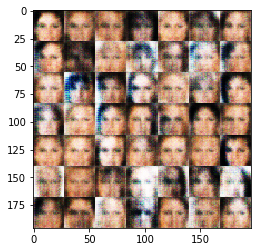

Epoch 1/1... Batch 510... Discriminator Loss: 0.9182... Generator Loss: 0.7336
Epoch 1/1... Batch 520... Discriminator Loss: 1.1855... Generator Loss: 0.8597
Epoch 1/1... Batch 530... Discriminator Loss: 1.1620... Generator Loss: 1.1366
Epoch 1/1... Batch 540... Discriminator Loss: 1.1844... Generator Loss: 0.4767
Epoch 1/1... Batch 550... Discriminator Loss: 1.2699... Generator Loss: 0.4167
Epoch 1/1... Batch 560... Discriminator Loss: 1.3313... Generator Loss: 0.4112
Epoch 1/1... Batch 570... Discriminator Loss: 1.4900... Generator Loss: 0.3212
Epoch 1/1... Batch 580... Discriminator Loss: 1.3026... Generator Loss: 0.4303
Epoch 1/1... Batch 590... Discriminator Loss: 1.0560... Generator Loss: 1.0496
Epoch 1/1... Batch 600... Discriminator Loss: 1.0456... Generator Loss: 1.0875


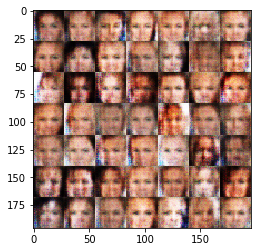

Epoch 1/1... Batch 610... Discriminator Loss: 1.1542... Generator Loss: 0.5289
Epoch 1/1... Batch 620... Discriminator Loss: 1.0045... Generator Loss: 0.6029
Epoch 1/1... Batch 630... Discriminator Loss: 1.0878... Generator Loss: 0.6503
Epoch 1/1... Batch 640... Discriminator Loss: 1.6124... Generator Loss: 0.2606
Epoch 1/1... Batch 650... Discriminator Loss: 1.2059... Generator Loss: 0.4719
Epoch 1/1... Batch 660... Discriminator Loss: 0.9690... Generator Loss: 0.9076
Epoch 1/1... Batch 670... Discriminator Loss: 0.9216... Generator Loss: 1.1096
Epoch 1/1... Batch 680... Discriminator Loss: 0.9599... Generator Loss: 0.7450
Epoch 1/1... Batch 690... Discriminator Loss: 0.7993... Generator Loss: 1.2080
Epoch 1/1... Batch 700... Discriminator Loss: 1.6557... Generator Loss: 0.2443


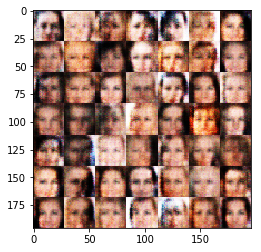

Epoch 1/1... Batch 710... Discriminator Loss: 1.4795... Generator Loss: 0.3111
Epoch 1/1... Batch 720... Discriminator Loss: 1.1380... Generator Loss: 0.5205
Epoch 1/1... Batch 730... Discriminator Loss: 1.8203... Generator Loss: 0.2035
Epoch 1/1... Batch 740... Discriminator Loss: 1.1838... Generator Loss: 0.4837
Epoch 1/1... Batch 750... Discriminator Loss: 1.5467... Generator Loss: 0.3370
Epoch 1/1... Batch 760... Discriminator Loss: 1.7666... Generator Loss: 0.2238
Epoch 1/1... Batch 770... Discriminator Loss: 1.6036... Generator Loss: 0.2668
Epoch 1/1... Batch 780... Discriminator Loss: 1.0155... Generator Loss: 1.3842
Epoch 1/1... Batch 790... Discriminator Loss: 0.9270... Generator Loss: 1.2785
Epoch 1/1... Batch 800... Discriminator Loss: 1.6907... Generator Loss: 0.2450


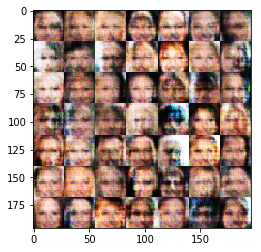

Epoch 1/1... Batch 810... Discriminator Loss: 1.3568... Generator Loss: 0.4221
Epoch 1/1... Batch 820... Discriminator Loss: 1.3753... Generator Loss: 0.3486
Epoch 1/1... Batch 830... Discriminator Loss: 1.4619... Generator Loss: 0.3146
Epoch 1/1... Batch 840... Discriminator Loss: 1.4711... Generator Loss: 0.3119
Epoch 1/1... Batch 850... Discriminator Loss: 1.1291... Generator Loss: 1.3837
Epoch 1/1... Batch 860... Discriminator Loss: 1.2214... Generator Loss: 1.7129
Epoch 1/1... Batch 870... Discriminator Loss: 1.0630... Generator Loss: 1.3398
Epoch 1/1... Batch 880... Discriminator Loss: 0.9367... Generator Loss: 0.9300
Epoch 1/1... Batch 890... Discriminator Loss: 1.2151... Generator Loss: 1.5026
Epoch 1/1... Batch 900... Discriminator Loss: 1.0411... Generator Loss: 0.9121


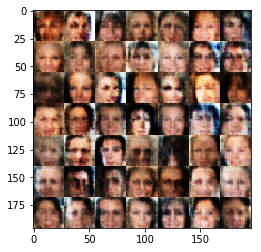

Epoch 1/1... Batch 910... Discriminator Loss: 1.7076... Generator Loss: 0.2274
Epoch 1/1... Batch 920... Discriminator Loss: 1.8673... Generator Loss: 0.2063
Epoch 1/1... Batch 930... Discriminator Loss: 1.7759... Generator Loss: 0.2182
Epoch 1/1... Batch 940... Discriminator Loss: 1.1482... Generator Loss: 1.8216
Epoch 1/1... Batch 950... Discriminator Loss: 0.7551... Generator Loss: 1.0100
Epoch 1/1... Batch 960... Discriminator Loss: 1.0517... Generator Loss: 0.6787
Epoch 1/1... Batch 970... Discriminator Loss: 0.9469... Generator Loss: 0.9568
Epoch 1/1... Batch 980... Discriminator Loss: 1.1510... Generator Loss: 0.4851
Epoch 1/1... Batch 990... Discriminator Loss: 1.2298... Generator Loss: 0.4536
Epoch 1/1... Batch 1000... Discriminator Loss: 1.6202... Generator Loss: 0.2624


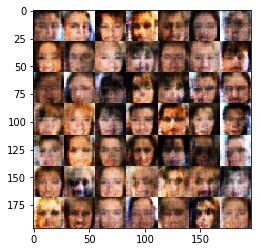

Epoch 1/1... Batch 1010... Discriminator Loss: 1.3185... Generator Loss: 0.3723
Epoch 1/1... Batch 1020... Discriminator Loss: 1.6382... Generator Loss: 0.2633
Epoch 1/1... Batch 1030... Discriminator Loss: 1.4542... Generator Loss: 0.3210
Epoch 1/1... Batch 1040... Discriminator Loss: 1.9640... Generator Loss: 0.1742
Epoch 1/1... Batch 1050... Discriminator Loss: 1.2739... Generator Loss: 0.4291
Epoch 1/1... Batch 1060... Discriminator Loss: 1.7500... Generator Loss: 0.2171
Epoch 1/1... Batch 1070... Discriminator Loss: 1.7117... Generator Loss: 0.2362
Epoch 1/1... Batch 1080... Discriminator Loss: 1.2209... Generator Loss: 0.4286
Epoch 1/1... Batch 1090... Discriminator Loss: 1.5014... Generator Loss: 0.3050
Epoch 1/1... Batch 1100... Discriminator Loss: 2.1651... Generator Loss: 0.1426


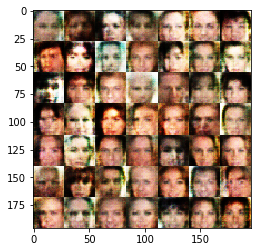

Epoch 1/1... Batch 1110... Discriminator Loss: 1.7508... Generator Loss: 0.2199
Epoch 1/1... Batch 1120... Discriminator Loss: 1.7066... Generator Loss: 0.2380
Epoch 1/1... Batch 1130... Discriminator Loss: 1.3439... Generator Loss: 0.3855
Epoch 1/1... Batch 1140... Discriminator Loss: 1.8616... Generator Loss: 0.2078
Epoch 1/1... Batch 1150... Discriminator Loss: 2.2996... Generator Loss: 0.1257
Epoch 1/1... Batch 1160... Discriminator Loss: 1.1615... Generator Loss: 0.4711
Epoch 1/1... Batch 1170... Discriminator Loss: 0.9990... Generator Loss: 1.0839
Epoch 1/1... Batch 1180... Discriminator Loss: 0.7085... Generator Loss: 1.0534
Epoch 1/1... Batch 1190... Discriminator Loss: 0.6414... Generator Loss: 1.2757
Epoch 1/1... Batch 1200... Discriminator Loss: 1.2026... Generator Loss: 2.0623


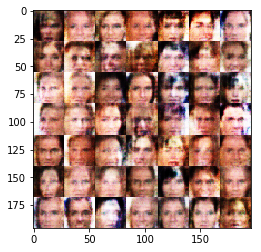

Epoch 1/1... Batch 1210... Discriminator Loss: 1.1716... Generator Loss: 1.2590
Epoch 1/1... Batch 1220... Discriminator Loss: 1.4063... Generator Loss: 0.3273
Epoch 1/1... Batch 1230... Discriminator Loss: 2.2732... Generator Loss: 0.1275
Epoch 1/1... Batch 1240... Discriminator Loss: 2.1752... Generator Loss: 0.1373
Epoch 1/1... Batch 1250... Discriminator Loss: 1.8178... Generator Loss: 0.2243
Epoch 1/1... Batch 1260... Discriminator Loss: 1.3111... Generator Loss: 0.3963
Epoch 1/1... Batch 1270... Discriminator Loss: 1.7773... Generator Loss: 0.2092
Epoch 1/1... Batch 1280... Discriminator Loss: 2.1322... Generator Loss: 0.1620
Epoch 1/1... Batch 1290... Discriminator Loss: 1.3300... Generator Loss: 0.3695
Epoch 1/1... Batch 1300... Discriminator Loss: 2.3509... Generator Loss: 0.1306


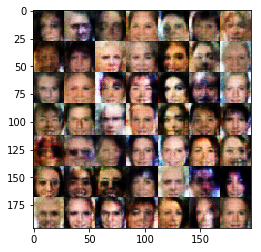

Epoch 1/1... Batch 1310... Discriminator Loss: 1.6151... Generator Loss: 0.2651
Epoch 1/1... Batch 1320... Discriminator Loss: 1.9888... Generator Loss: 3.3459
Epoch 1/1... Batch 1330... Discriminator Loss: 0.5359... Generator Loss: 1.9467
Epoch 1/1... Batch 1340... Discriminator Loss: 1.1486... Generator Loss: 2.1740
Epoch 1/1... Batch 1350... Discriminator Loss: 0.9799... Generator Loss: 1.3691
Epoch 1/1... Batch 1360... Discriminator Loss: 1.1660... Generator Loss: 1.6229
Epoch 1/1... Batch 1370... Discriminator Loss: 1.1742... Generator Loss: 0.6072
Epoch 1/1... Batch 1380... Discriminator Loss: 1.1164... Generator Loss: 1.2474
Epoch 1/1... Batch 1390... Discriminator Loss: 1.0685... Generator Loss: 2.3921
Epoch 1/1... Batch 1400... Discriminator Loss: 0.6824... Generator Loss: 2.0340


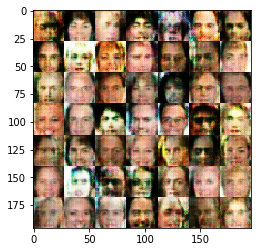

Epoch 1/1... Batch 1410... Discriminator Loss: 0.9931... Generator Loss: 1.3944
Epoch 1/1... Batch 1420... Discriminator Loss: 0.9425... Generator Loss: 1.1442
Epoch 1/1... Batch 1430... Discriminator Loss: 0.8560... Generator Loss: 0.9977
Epoch 1/1... Batch 1440... Discriminator Loss: 0.6141... Generator Loss: 1.7634
Epoch 1/1... Batch 1450... Discriminator Loss: 1.7383... Generator Loss: 0.2475
Epoch 1/1... Batch 1460... Discriminator Loss: 1.8628... Generator Loss: 0.1968
Epoch 1/1... Batch 1470... Discriminator Loss: 1.8519... Generator Loss: 0.2069
Epoch 1/1... Batch 1480... Discriminator Loss: 1.9746... Generator Loss: 0.1787
Epoch 1/1... Batch 1490... Discriminator Loss: 1.7789... Generator Loss: 0.2278
Epoch 1/1... Batch 1500... Discriminator Loss: 1.5204... Generator Loss: 0.2968


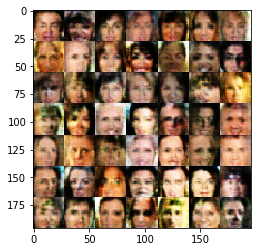

Epoch 1/1... Batch 1510... Discriminator Loss: 1.6973... Generator Loss: 0.2435
Epoch 1/1... Batch 1520... Discriminator Loss: 2.0142... Generator Loss: 0.1842
Epoch 1/1... Batch 1530... Discriminator Loss: 0.3640... Generator Loss: 2.7398
Epoch 1/1... Batch 1540... Discriminator Loss: 1.9706... Generator Loss: 2.8726
Epoch 1/1... Batch 1550... Discriminator Loss: 1.2497... Generator Loss: 0.4113
Epoch 1/1... Batch 1560... Discriminator Loss: 0.3369... Generator Loss: 1.8482
Epoch 1/1... Batch 1570... Discriminator Loss: 1.6668... Generator Loss: 0.2659
Epoch 1/1... Batch 1580... Discriminator Loss: 0.5977... Generator Loss: 1.6243
Epoch 1/1... Batch 1590... Discriminator Loss: 0.2628... Generator Loss: 3.0122
Epoch 1/1... Batch 1600... Discriminator Loss: 0.9789... Generator Loss: 2.4133


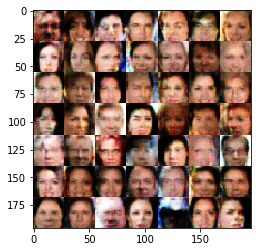

Epoch 1/1... Batch 1610... Discriminator Loss: 0.8908... Generator Loss: 0.8715
Epoch 1/1... Batch 1620... Discriminator Loss: 0.1882... Generator Loss: 2.8899
Epoch 1/1... Batch 1630... Discriminator Loss: 0.6374... Generator Loss: 1.0594
Epoch 1/1... Batch 1640... Discriminator Loss: 0.1266... Generator Loss: 3.0759
Epoch 1/1... Batch 1650... Discriminator Loss: 1.2938... Generator Loss: 2.8800
Epoch 1/1... Batch 1660... Discriminator Loss: 0.1573... Generator Loss: 3.4890
Epoch 1/1... Batch 1670... Discriminator Loss: 0.4580... Generator Loss: 1.2879
Epoch 1/1... Batch 1680... Discriminator Loss: 0.7944... Generator Loss: 1.0600
Epoch 1/1... Batch 1690... Discriminator Loss: 0.7378... Generator Loss: 2.2016
Epoch 1/1... Batch 1700... Discriminator Loss: 1.2994... Generator Loss: 2.2951


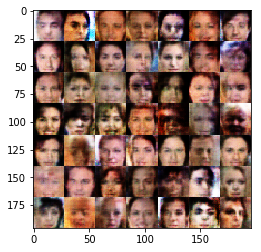

Epoch 1/1... Batch 1710... Discriminator Loss: 0.4469... Generator Loss: 1.6267
Epoch 1/1... Batch 1720... Discriminator Loss: 0.3781... Generator Loss: 2.9005
Epoch 1/1... Batch 1730... Discriminator Loss: 0.9488... Generator Loss: 0.7954
Epoch 1/1... Batch 1740... Discriminator Loss: 1.1991... Generator Loss: 0.5238
Epoch 1/1... Batch 1750... Discriminator Loss: 1.1354... Generator Loss: 0.4659
Epoch 1/1... Batch 1760... Discriminator Loss: 0.4362... Generator Loss: 1.2967
Epoch 1/1... Batch 1770... Discriminator Loss: 1.1686... Generator Loss: 0.4628
Epoch 1/1... Batch 1780... Discriminator Loss: 2.4675... Generator Loss: 0.1062
Epoch 1/1... Batch 1790... Discriminator Loss: 0.9002... Generator Loss: 0.6762
Epoch 1/1... Batch 1800... Discriminator Loss: 1.2444... Generator Loss: 0.4055


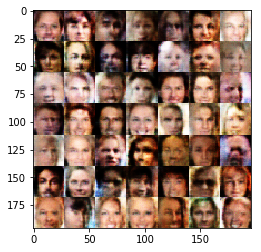

Epoch 1/1... Batch 1810... Discriminator Loss: 0.9139... Generator Loss: 0.6543
Epoch 1/1... Batch 1820... Discriminator Loss: 0.6375... Generator Loss: 2.8418
Epoch 1/1... Batch 1830... Discriminator Loss: 0.2339... Generator Loss: 2.4775
Epoch 1/1... Batch 1840... Discriminator Loss: 1.4769... Generator Loss: 0.2926
Epoch 1/1... Batch 1850... Discriminator Loss: 1.4342... Generator Loss: 0.3520
Epoch 1/1... Batch 1860... Discriminator Loss: 0.5939... Generator Loss: 1.0445
Epoch 1/1... Batch 1870... Discriminator Loss: 2.0331... Generator Loss: 0.1810
Epoch 1/1... Batch 1880... Discriminator Loss: 0.1573... Generator Loss: 3.3679
Epoch 1/1... Batch 1890... Discriminator Loss: 0.3060... Generator Loss: 2.6781
Epoch 1/1... Batch 1900... Discriminator Loss: 0.5389... Generator Loss: 3.8083


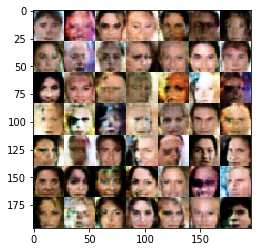

Epoch 1/1... Batch 1910... Discriminator Loss: 1.2723... Generator Loss: 0.4579
Epoch 1/1... Batch 1920... Discriminator Loss: 1.1438... Generator Loss: 0.4840
Epoch 1/1... Batch 1930... Discriminator Loss: 1.7137... Generator Loss: 0.2555
Epoch 1/1... Batch 1940... Discriminator Loss: 2.5463... Generator Loss: 0.1051
Epoch 1/1... Batch 1950... Discriminator Loss: 1.0393... Generator Loss: 0.5653
Epoch 1/1... Batch 1960... Discriminator Loss: 1.9479... Generator Loss: 0.1863
Epoch 1/1... Batch 1970... Discriminator Loss: 0.5394... Generator Loss: 1.1757
Epoch 1/1... Batch 1980... Discriminator Loss: 2.6885... Generator Loss: 0.0860
Epoch 1/1... Batch 1990... Discriminator Loss: 1.0797... Generator Loss: 0.5069
Epoch 1/1... Batch 2000... Discriminator Loss: 3.2217... Generator Loss: 0.0641


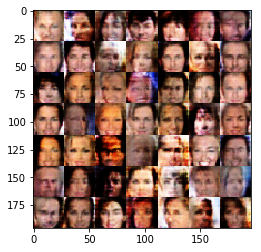

Epoch 1/1... Batch 2010... Discriminator Loss: 0.5486... Generator Loss: 1.0152
Epoch 1/1... Batch 2020... Discriminator Loss: 0.9342... Generator Loss: 0.6037
Epoch 1/1... Batch 2030... Discriminator Loss: 1.8969... Generator Loss: 0.2203
Epoch 1/1... Batch 2040... Discriminator Loss: 0.2098... Generator Loss: 2.8383
Epoch 1/1... Batch 2050... Discriminator Loss: 0.9848... Generator Loss: 1.3339
Epoch 1/1... Batch 2060... Discriminator Loss: 0.7428... Generator Loss: 0.9566
Epoch 1/1... Batch 2070... Discriminator Loss: 2.1958... Generator Loss: 0.1514
Epoch 1/1... Batch 2080... Discriminator Loss: 1.7576... Generator Loss: 0.2653
Epoch 1/1... Batch 2090... Discriminator Loss: 0.5402... Generator Loss: 1.8273
Epoch 1/1... Batch 2100... Discriminator Loss: 1.5369... Generator Loss: 0.3120


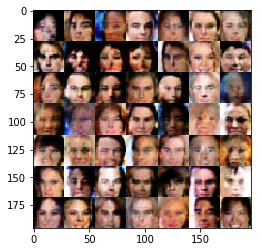

Epoch 1/1... Batch 2110... Discriminator Loss: 2.2268... Generator Loss: 3.9815
Epoch 1/1... Batch 2120... Discriminator Loss: 1.8170... Generator Loss: 0.2403
Epoch 1/1... Batch 2130... Discriminator Loss: 0.1604... Generator Loss: 2.6070
Epoch 1/1... Batch 2140... Discriminator Loss: 1.6837... Generator Loss: 2.9308
Epoch 1/1... Batch 2150... Discriminator Loss: 0.9605... Generator Loss: 0.6334
Epoch 1/1... Batch 2160... Discriminator Loss: 0.9196... Generator Loss: 0.9047
Epoch 1/1... Batch 2170... Discriminator Loss: 0.3370... Generator Loss: 2.2441
Epoch 1/1... Batch 2180... Discriminator Loss: 1.7672... Generator Loss: 4.4470
Epoch 1/1... Batch 2190... Discriminator Loss: 0.3209... Generator Loss: 2.1822
Epoch 1/1... Batch 2200... Discriminator Loss: 2.5627... Generator Loss: 4.3805


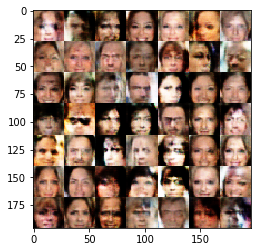

Epoch 1/1... Batch 2210... Discriminator Loss: 1.2954... Generator Loss: 2.2839
Epoch 1/1... Batch 2220... Discriminator Loss: 0.2258... Generator Loss: 3.3597
Epoch 1/1... Batch 2230... Discriminator Loss: 2.3383... Generator Loss: 3.9308
Epoch 1/1... Batch 2240... Discriminator Loss: 0.4808... Generator Loss: 1.1186
Epoch 1/1... Batch 2250... Discriminator Loss: 1.9266... Generator Loss: 0.2005
Epoch 1/1... Batch 2260... Discriminator Loss: 0.7460... Generator Loss: 3.3914
Epoch 1/1... Batch 2270... Discriminator Loss: 0.2365... Generator Loss: 6.0761
Epoch 1/1... Batch 2280... Discriminator Loss: 0.8160... Generator Loss: 0.6570
Epoch 1/1... Batch 2290... Discriminator Loss: 1.2259... Generator Loss: 0.4844
Epoch 1/1... Batch 2300... Discriminator Loss: 1.9555... Generator Loss: 0.1890


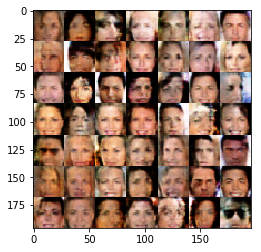

Epoch 1/1... Batch 2310... Discriminator Loss: 0.4119... Generator Loss: 1.3014
Epoch 1/1... Batch 2320... Discriminator Loss: 0.6850... Generator Loss: 0.8345
Epoch 1/1... Batch 2330... Discriminator Loss: 1.8451... Generator Loss: 3.4233
Epoch 1/1... Batch 2340... Discriminator Loss: 1.2118... Generator Loss: 0.4887
Epoch 1/1... Batch 2350... Discriminator Loss: 0.9953... Generator Loss: 1.0074
Epoch 1/1... Batch 2360... Discriminator Loss: 0.3582... Generator Loss: 3.0391
Epoch 1/1... Batch 2370... Discriminator Loss: 0.3550... Generator Loss: 1.6200
Epoch 1/1... Batch 2380... Discriminator Loss: 1.4041... Generator Loss: 4.9669
Epoch 1/1... Batch 2390... Discriminator Loss: 0.2748... Generator Loss: 1.7276
Epoch 1/1... Batch 2400... Discriminator Loss: 0.0685... Generator Loss: 4.2946


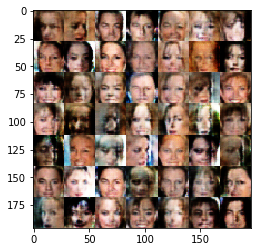

Epoch 1/1... Batch 2410... Discriminator Loss: 0.5459... Generator Loss: 4.1484
Epoch 1/1... Batch 2420... Discriminator Loss: 2.2444... Generator Loss: 0.1533
Epoch 1/1... Batch 2430... Discriminator Loss: 1.8362... Generator Loss: 0.2141
Epoch 1/1... Batch 2440... Discriminator Loss: 1.8511... Generator Loss: 0.1999
Epoch 1/1... Batch 2450... Discriminator Loss: 1.0404... Generator Loss: 4.0235
Epoch 1/1... Batch 2460... Discriminator Loss: 0.2056... Generator Loss: 3.7305
Epoch 1/1... Batch 2470... Discriminator Loss: 1.0145... Generator Loss: 0.5434
Epoch 1/1... Batch 2480... Discriminator Loss: 0.2041... Generator Loss: 2.1343
Epoch 1/1... Batch 2490... Discriminator Loss: 1.4561... Generator Loss: 0.3040
Epoch 1/1... Batch 2500... Discriminator Loss: 0.9511... Generator Loss: 0.6320


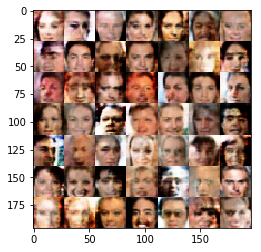

Epoch 1/1... Batch 2510... Discriminator Loss: 0.4376... Generator Loss: 1.3752
Epoch 1/1... Batch 2520... Discriminator Loss: 0.4581... Generator Loss: 1.2931
Epoch 1/1... Batch 2530... Discriminator Loss: 0.5911... Generator Loss: 1.0350
Epoch 1/1... Batch 2540... Discriminator Loss: 1.1111... Generator Loss: 0.4876
Epoch 1/1... Batch 2550... Discriminator Loss: 0.3554... Generator Loss: 3.5627
Epoch 1/1... Batch 2560... Discriminator Loss: 0.8106... Generator Loss: 0.7469
Epoch 1/1... Batch 2570... Discriminator Loss: 0.0905... Generator Loss: 3.5384
Epoch 1/1... Batch 2580... Discriminator Loss: 3.1616... Generator Loss: 0.0518
Epoch 1/1... Batch 2590... Discriminator Loss: 1.5310... Generator Loss: 0.3072
Epoch 1/1... Batch 2600... Discriminator Loss: 0.1559... Generator Loss: 2.5248


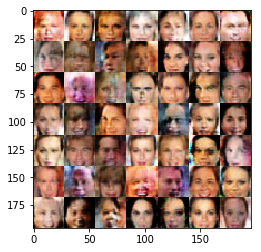

Epoch 1/1... Batch 2610... Discriminator Loss: 1.6508... Generator Loss: 0.2663
Epoch 1/1... Batch 2620... Discriminator Loss: 0.9422... Generator Loss: 0.6080
Epoch 1/1... Batch 2630... Discriminator Loss: 0.6479... Generator Loss: 3.8964
Epoch 1/1... Batch 2640... Discriminator Loss: 0.6766... Generator Loss: 0.8800
Epoch 1/1... Batch 2650... Discriminator Loss: 1.2452... Generator Loss: 0.3930
Epoch 1/1... Batch 2660... Discriminator Loss: 0.6758... Generator Loss: 0.8496
Epoch 1/1... Batch 2670... Discriminator Loss: 1.3959... Generator Loss: 4.1154
Epoch 1/1... Batch 2680... Discriminator Loss: 1.8855... Generator Loss: 0.1852
Epoch 1/1... Batch 2690... Discriminator Loss: 0.3679... Generator Loss: 3.9032
Epoch 1/1... Batch 2700... Discriminator Loss: 2.0455... Generator Loss: 0.1669


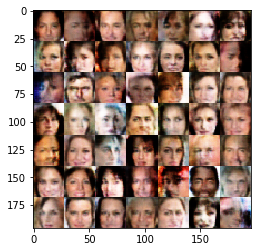

Epoch 1/1... Batch 2710... Discriminator Loss: 0.6782... Generator Loss: 3.0153
Epoch 1/1... Batch 2720... Discriminator Loss: 0.1920... Generator Loss: 2.4760
Epoch 1/1... Batch 2730... Discriminator Loss: 0.8009... Generator Loss: 0.9737
Epoch 1/1... Batch 2740... Discriminator Loss: 0.5570... Generator Loss: 1.0386
Epoch 1/1... Batch 2750... Discriminator Loss: 2.1337... Generator Loss: 0.1559
Epoch 1/1... Batch 2760... Discriminator Loss: 0.2592... Generator Loss: 2.9341
Epoch 1/1... Batch 2770... Discriminator Loss: 0.8544... Generator Loss: 2.2305
Epoch 1/1... Batch 2780... Discriminator Loss: 0.2720... Generator Loss: 2.7982
Epoch 1/1... Batch 2790... Discriminator Loss: 1.0805... Generator Loss: 3.2707
Epoch 1/1... Batch 2800... Discriminator Loss: 0.1674... Generator Loss: 3.8017


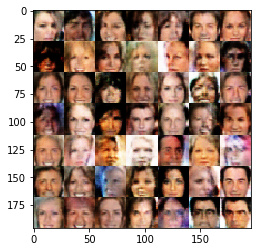

Epoch 1/1... Batch 2810... Discriminator Loss: 1.2595... Generator Loss: 0.4047
Epoch 1/1... Batch 2820... Discriminator Loss: 0.2623... Generator Loss: 1.6762
Epoch 1/1... Batch 2830... Discriminator Loss: 0.3203... Generator Loss: 1.7981
Epoch 1/1... Batch 2840... Discriminator Loss: 2.5399... Generator Loss: 0.1035
Epoch 1/1... Batch 2850... Discriminator Loss: 0.0665... Generator Loss: 3.8219
Epoch 1/1... Batch 2860... Discriminator Loss: 1.7648... Generator Loss: 0.2398
Epoch 1/1... Batch 2870... Discriminator Loss: 1.2779... Generator Loss: 5.8124
Epoch 1/1... Batch 2880... Discriminator Loss: 0.1855... Generator Loss: 3.6010
Epoch 1/1... Batch 2890... Discriminator Loss: 0.1271... Generator Loss: 3.6688
Epoch 1/1... Batch 2900... Discriminator Loss: 0.7047... Generator Loss: 4.0883


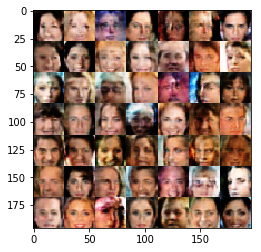

Epoch 1/1... Batch 2910... Discriminator Loss: 0.7694... Generator Loss: 6.0537
Epoch 1/1... Batch 2920... Discriminator Loss: 0.8062... Generator Loss: 0.7279
Epoch 1/1... Batch 2930... Discriminator Loss: 1.6171... Generator Loss: 0.2697
Epoch 1/1... Batch 2940... Discriminator Loss: 0.5354... Generator Loss: 1.6231
Epoch 1/1... Batch 2950... Discriminator Loss: 0.7309... Generator Loss: 3.4065
Epoch 1/1... Batch 2960... Discriminator Loss: 0.4454... Generator Loss: 3.6823
Epoch 1/1... Batch 2970... Discriminator Loss: 1.5580... Generator Loss: 6.1587
Epoch 1/1... Batch 2980... Discriminator Loss: 0.2287... Generator Loss: 1.7309
Epoch 1/1... Batch 2990... Discriminator Loss: 1.3700... Generator Loss: 0.3776
Epoch 1/1... Batch 3000... Discriminator Loss: 0.3211... Generator Loss: 1.4976


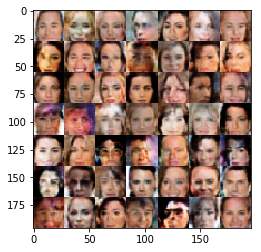

Epoch 1/1... Batch 3010... Discriminator Loss: 0.3834... Generator Loss: 3.1108
Epoch 1/1... Batch 3020... Discriminator Loss: 0.6800... Generator Loss: 0.8243
Epoch 1/1... Batch 3030... Discriminator Loss: 3.3770... Generator Loss: 0.0452
Epoch 1/1... Batch 3040... Discriminator Loss: 0.6934... Generator Loss: 3.2977
Epoch 1/1... Batch 3050... Discriminator Loss: 0.7699... Generator Loss: 0.8188
Epoch 1/1... Batch 3060... Discriminator Loss: 0.7901... Generator Loss: 0.7561
Epoch 1/1... Batch 3070... Discriminator Loss: 2.1049... Generator Loss: 0.1535
Epoch 1/1... Batch 3080... Discriminator Loss: 2.2569... Generator Loss: 0.1418
Epoch 1/1... Batch 3090... Discriminator Loss: 0.8395... Generator Loss: 0.7256
Epoch 1/1... Batch 3100... Discriminator Loss: 0.8386... Generator Loss: 0.7200


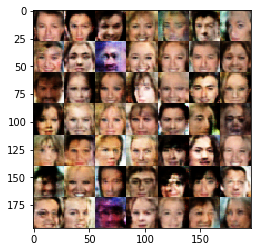

Epoch 1/1... Batch 3110... Discriminator Loss: 2.0984... Generator Loss: 0.1795
Epoch 1/1... Batch 3120... Discriminator Loss: 1.6459... Generator Loss: 0.2589
Epoch 1/1... Batch 3130... Discriminator Loss: 0.1895... Generator Loss: 2.5319
Epoch 1/1... Batch 3140... Discriminator Loss: 1.0195... Generator Loss: 0.5596
Epoch 1/1... Batch 3150... Discriminator Loss: 0.8025... Generator Loss: 0.8091
Epoch 1/1... Batch 3160... Discriminator Loss: 1.0394... Generator Loss: 0.5938


In [14]:
batch_size = 64
z_dim = 200
learning_rate = 0.0002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.